## Import Libraries

In [52]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from wordcloud import WordCloud

pd.set_option('display.max_colwidth', None)

## Load Dataset

In [2]:
df = pd.read_csv('../data/review_spotify.csv')

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              500000 non-null  object
 1   userName              500000 non-null  object
 2   userImage             500000 non-null  object
 3   content               499988 non-null  object
 4   score                 500000 non-null  int64 
 5   thumbsUpCount         500000 non-null  int64 
 6   reviewCreatedVersion  392854 non-null  object
 7   at                    500000 non-null  object
 8   replyContent          42609 non-null   object
 9   repliedAt             42609 non-null   object
 10  appVersion            392854 non-null  object
dtypes: int64(2), object(9)
memory usage: 42.0+ MB


In [17]:
df.describe()

,score,thumbsUpCount
count,500000.000000,500000.000000
mean,3.314144,3.065368
std,1.813472,104.057273
min,1.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,23043.000000


In [4]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ad73063f-976a-4905-bc32-d21f9a3221e4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,keren,5,0,9.0.26.632,2025-04-09 13:36:54,NaN,NaN,9.0.26.632
1,8ae8b09d-17dd-402a-a525-b68c61742976,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,pretty good,5,0,9.0.32.624,2025-04-09 13:34:58,NaN,NaN,9.0.32.624
2,dfa29675-61a2-4cb7-81b2-d14a5f5a7ba0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice app for music,5,0,9.0.28.630,2025-04-09 13:32:33,NaN,NaN,9.0.28.630
3,877813e9-a951-49cd-94a4-467a068bae86,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Can't log in, using YouTube prime instead",5,0,9.0.32.624,2025-04-09 13:28:59,NaN,NaN,9.0.32.624
4,2701ca76-6c08-44e8-b3ae-578efa759d6a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,sometimes you people impersonating other artis...,2,0,NaN,2025-04-09 13:25:07,NaN,NaN,NaN


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

reviewId                     0
userName                     0
userImage                    0
content                     12
score                        0
thumbsUpCount                0
reviewCreatedVersion    107146
at                           0
replyContent            457391
repliedAt               457391
appVersion              107146
dtype: int64

In [7]:
df = df.drop(columns=['userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'])

In [18]:
df = df.dropna(subset=['content', 'score'])

In [21]:
df['at'] = pd.to_datetime(df['at'])

/var/folders/xh/wn1kh5c56yvb_vrns69_p1g80000gn/T/ipykernel_8305/923082581.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(x='score', data=df, palette=sns.color_palette("coolwarm_r", as_cmap=False), hue='score')


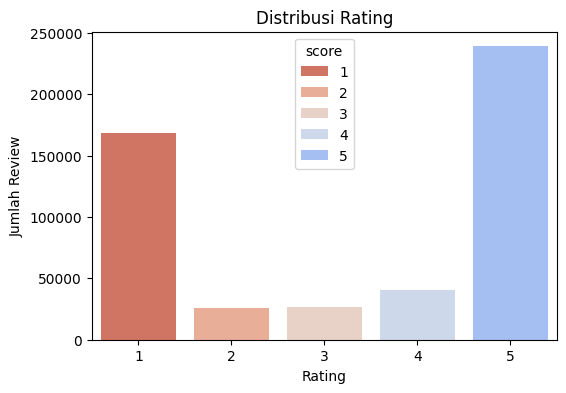

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='score', data=df, palette=sns.color_palette("coolwarm_r", as_cmap=False), hue='score')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah Review")
plt.show()

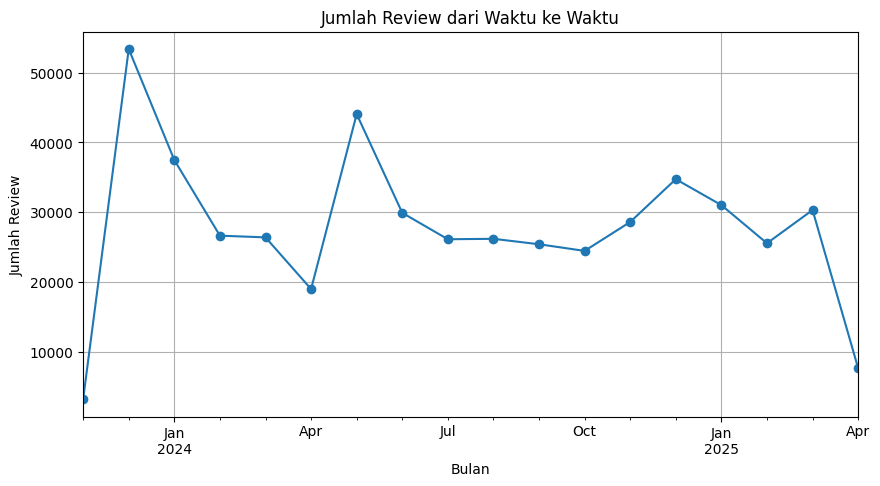

In [43]:
df['year_month'] = df['at'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()

monthly_counts.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Jumlah Review dari Waktu ke Waktu")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Review")
plt.grid(True)
plt.show()


In [20]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text) 
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [10]:
df['clean_content'] = df['content'].apply(clean_text)

In [16]:
df.sample(5)

,reviewId,content,score,thumbsUpCount,at,appVersion,clean_content
143931,19390db2-0769-4715-aba1-54f08088fe9d,Super app to play music,5,0,2024-11-18 00:25:32,8.9.4.304,super app to play music
135861,a52f3ce9-7bff-46a8-8b75-731b3e8be7bc,"Very bad experience, won't use it again 🤬🤬🤬",1,0,2024-11-26 20:19:17,NaN,very bad experience wont use it again
394723,97195107-473a-43b5-9d35-0772974c996a,"Leaving Spotify for good, couldn't even open my playlists, switching to yt music",1,0,2024-02-13 00:17:09,NaN,leaving spotify for good couldnt even open my playlists switching to yt music
400267,f7be32f5-6fec-4376-a380-5991911805b6,Broooo whyyy you gotta change the app it was honestly so good before,1,0,2024-02-07 00:21:43,NaN,broooo whyyy you gotta change the app it was honestly so good before
379841,d4fce39b-8002-4675-9b25-4a75adecc75f,"It is great, I just wish I could upload music",5,0,2024-02-29 08:52:10,8.9.14.543,it is great i just wish i could upload music


In [34]:
df['text_length'] = df['clean_content'].apply(lambda x: len(x.split()))

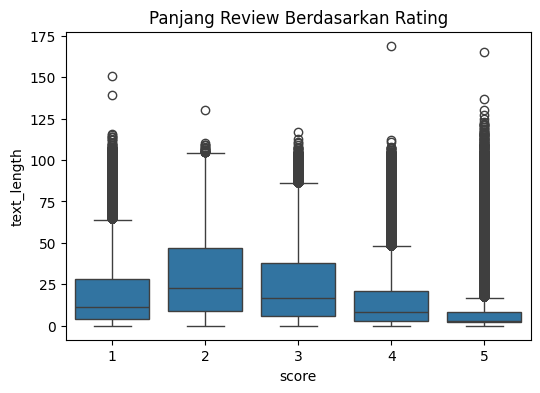

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='score', y='text_length', data=df)
plt.title("Panjang Review Berdasarkan Rating")
plt.show()

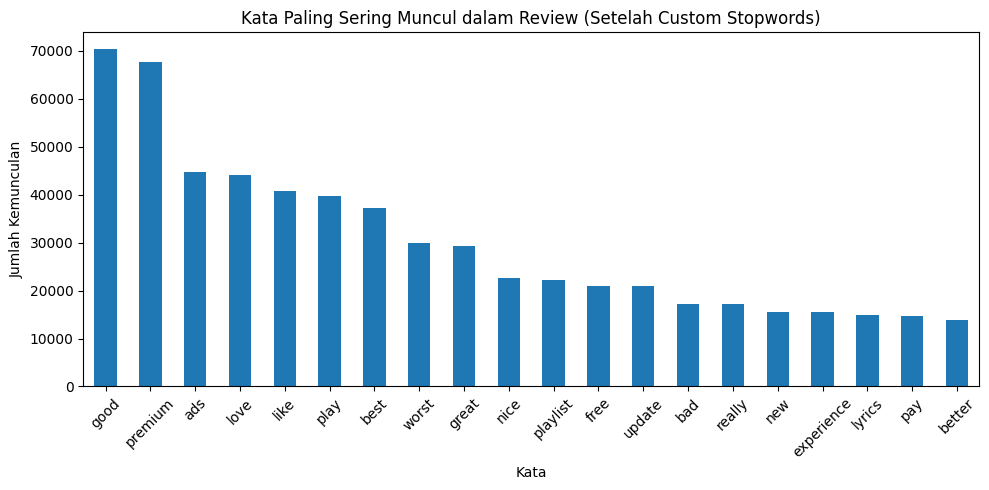

In [51]:
custom_stopwords = list(text.ENGLISH_STOP_WORDS.union([
    'app', 'spotify', 'music', 'songs', 'song', 'listen', 'just', 'dont', 'want', 'use', 'im', 'listening', 'time'
]))

vec = CountVectorizer(max_features=20, stop_words=custom_stopwords)
X = vec.fit_transform(df['clean_content'])

word_freq = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
word_freq.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Kata Paling Sering Muncul dalam Review (Setelah Custom Stopwords)")
plt.ylabel("Jumlah Kemunculan")
plt.xlabel("Kata")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

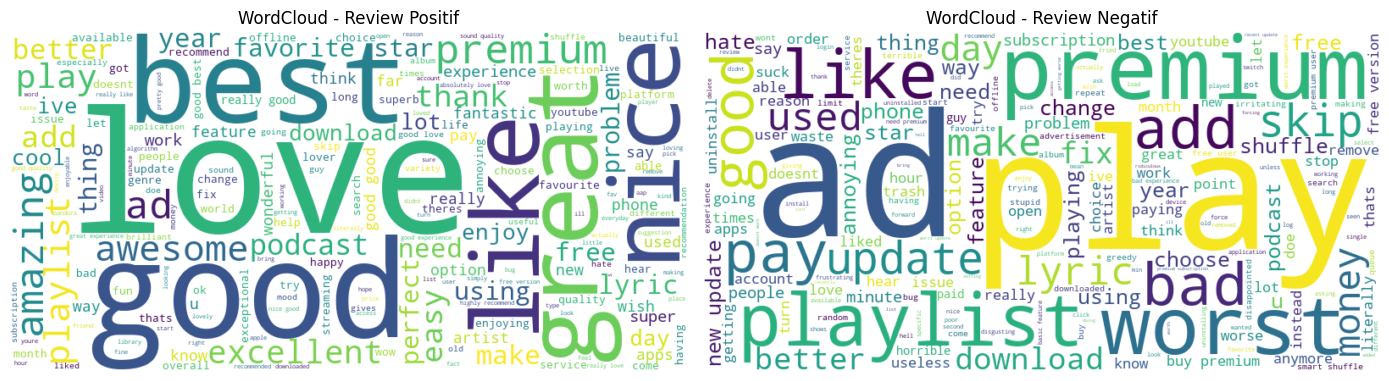

In [55]:
pos_text = " ".join(df[df['score'] >= 4]['clean_content'])
neg_text = " ".join(df[df['score'] <= 2]['clean_content'])

plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=800, height=400, stopwords=custom_stopwords, background_color='white').generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("WordCloud - Review Positif")
plt.axis('off')

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=800, height=400, stopwords=custom_stopwords, background_color='white').generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("WordCloud - Review Negatif")
plt.axis('off')

plt.tight_layout()
plt.show()